In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import json
import pandas as pd
import psycopg2
from datetime import date, datetime, timedelta


In [3]:
conn = psycopg2.connect("host='postgre-sqltest.dddeoxxxj1.us-west-2.rds.amazonaws.com' port=port dbname='database' user=xxxx password=pasword")
crs = {'init': 'epsg:4326'}

In [3]:
query = '''
SELECT  uts.anual_total_use_day, uts.date, wc.precipitation, wc.temp_max, wc.temp_media, wc.temp_min, wc.wind_speed,
       aq.dioxido_nitrogeno
FROM user_total_statistics uts
left join weather_conditions wc on wc.date = uts.date
left join air_quality aq on aq.date = uts.date
'''

data_usos = pd.read_sql(query, conn)


In [8]:
def cast_date(date):
    return datetime.strptime(date, '%Y-%m-%d')

data_usos['date'] = [str(i) for i in data_usos.date]
data_usos['date'] = data_usos.date.apply(cast_date)

In [6]:
def isWeekend(date):    
    day = date.weekday()
    if day == 5 or day == 6:
        return 1
    else:
        return 0

data_usos['weekend'] = data_usos.date.apply(isWeekend)

In [ ]:
data_usos['day'] = data_usos.apply(lambda fila: fila.date.weekday(), axis=1)
data_usos['month'] = data_usos.apply(lambda fila: fila.date.month, axis=1)
data_usos['year'] = data_usos.apply(lambda fila: fila.date.year, axis=1)

In [8]:
data_usos.to_csv('data_modelo')

In [3]:
data_usos = pd.read_csv('data_modelo', index_col = 0)

In [16]:
data_usos.tail()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year
1648,7282,2018-12-27,0.0,10.5,6.2,2.0,0.6,50.0,Invierno,0,3,12,2018
1649,7386,2018-12-28,0.0,12.7,7.1,1.5,1.4,46.0,Invierno,0,4,12,2018
1650,5584,2018-12-29,0.0,11.9,8.0,4.0,1.7,31.0,Invierno,1,5,12,2018
1651,5114,2018-12-30,0.0,14.2,8.7,3.2,1.1,38.0,Invierno,1,6,12,2018
1652,4718,2018-12-31,0.0,13.4,7.0,0.7,0.6,61.0,Invierno,0,0,12,2018


In [7]:
data_usos['date'] = data_usos.date.apply(cast_date)

In [9]:
data_usos = data_usos.sort_values('date', ascending=True)

In [10]:
data_usos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1653 entries, 2 to 1652
Data columns (total 13 columns):
anual_total_use_day    1653 non-null int64
date                   1653 non-null datetime64[ns]
precipitation          1651 non-null float64
temp_max               1651 non-null float64
temp_media             1651 non-null float64
temp_min               1651 non-null float64
wind_speed             1651 non-null float64
dioxido_nitrogeno      1650 non-null float64
season                 1653 non-null object
weekend                1653 non-null int64
day                    1653 non-null int64
month                  1653 non-null int64
year                   1653 non-null int64
dtypes: datetime64[ns](1), float64(6), int64(5), object(1)
memory usage: 180.8+ KB


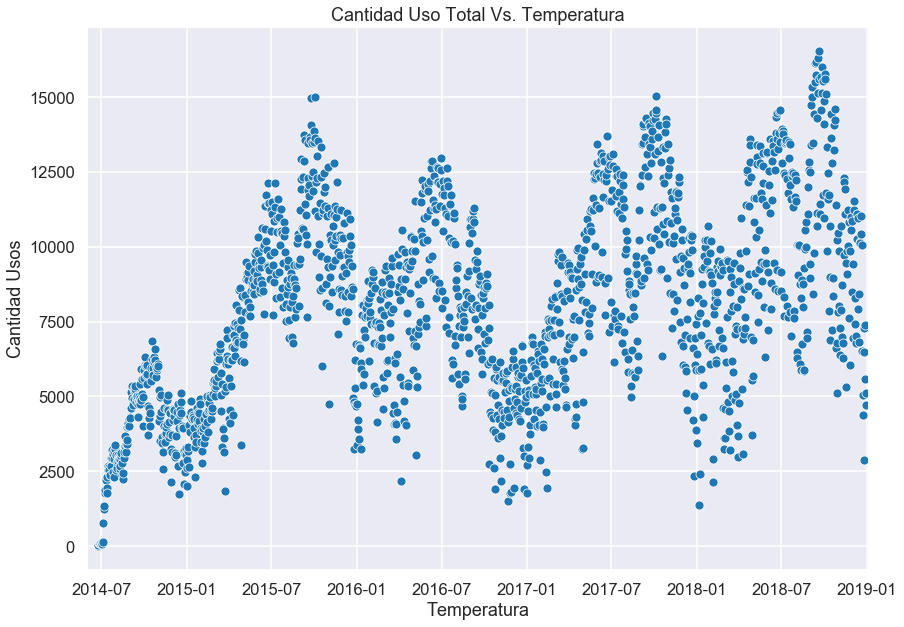

In [45]:
out = sns.scatterplot(x='date', y='anual_total_use_day', data=data_usos)
plt.xlim('2014-06-01', '2019-01-05')
plt.xlabel('Temperatura')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura')
plt.show()

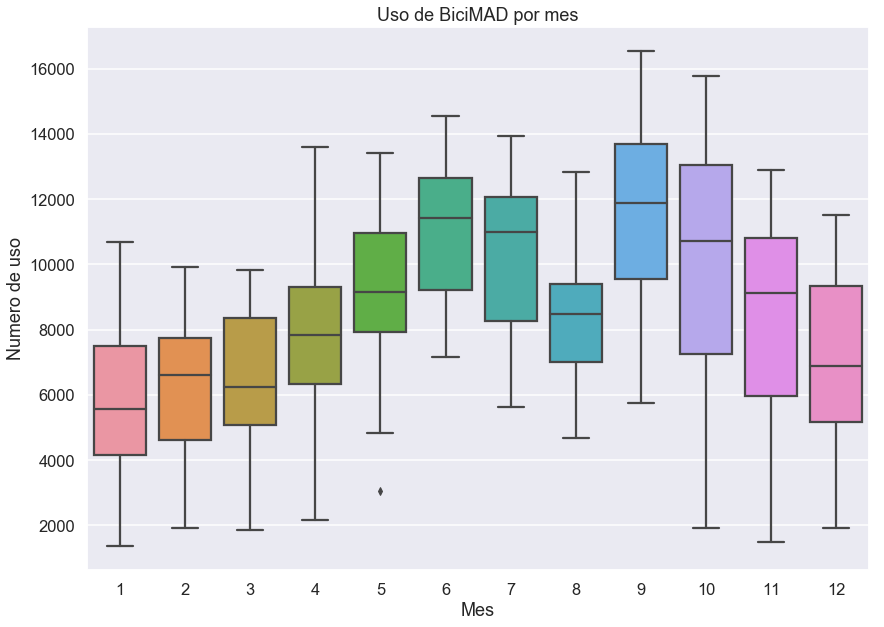

In [84]:
g = sns.boxplot(x='month', y='anual_total_use_day', data=data_usos[(data_usos.year != 2014)])

plt.title('Uso de BiciMAD por mes')
plt.xlabel('Mes')
plt.ylabel("Numero de uso")
plt.show()

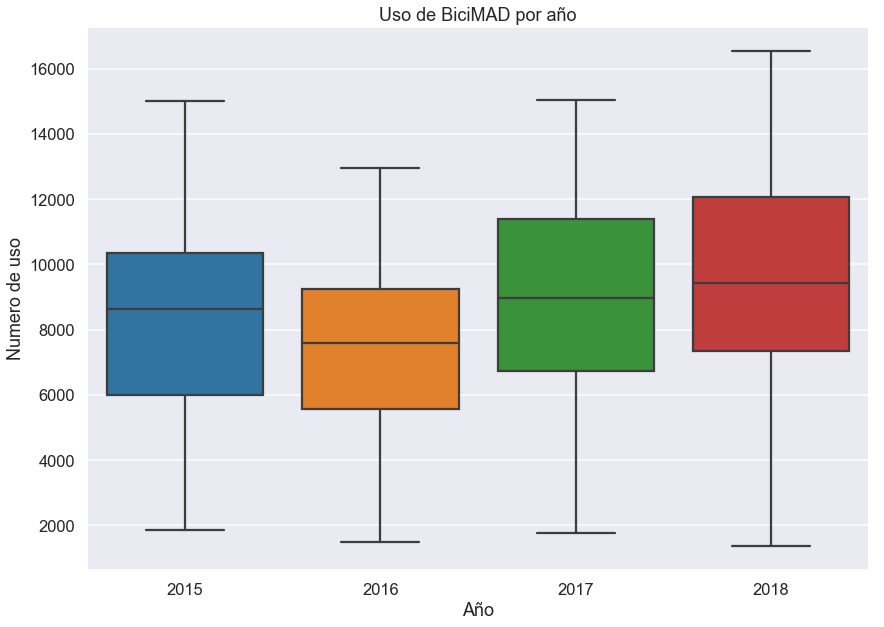

In [25]:
g = sns.boxplot(x='year', y='anual_total_use_day', data=data_usos[(data_usos.year != 2014)])

plt.title('Uso de BiciMAD por año')
plt.xlabel('Año')
plt.ylabel("Numero de uso")
plt.show()

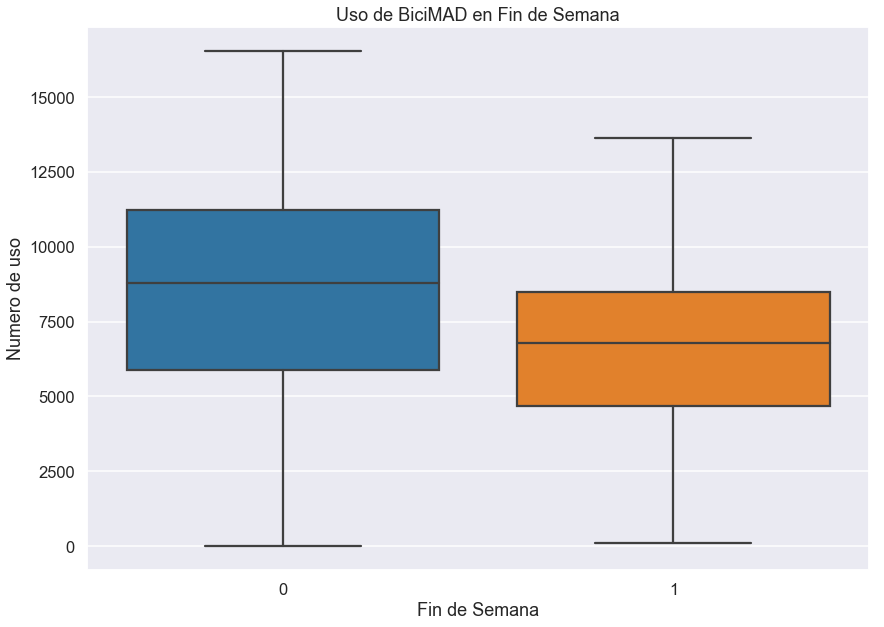

In [73]:
g = sns.boxplot(x='weekend', y='anual_total_use_day', data=data_usos)

plt.title('Uso de BiciMAD en Fin de Semana')
plt.xlabel('Fin de Semana')
plt.ylabel("Numero de uso")
plt.show()

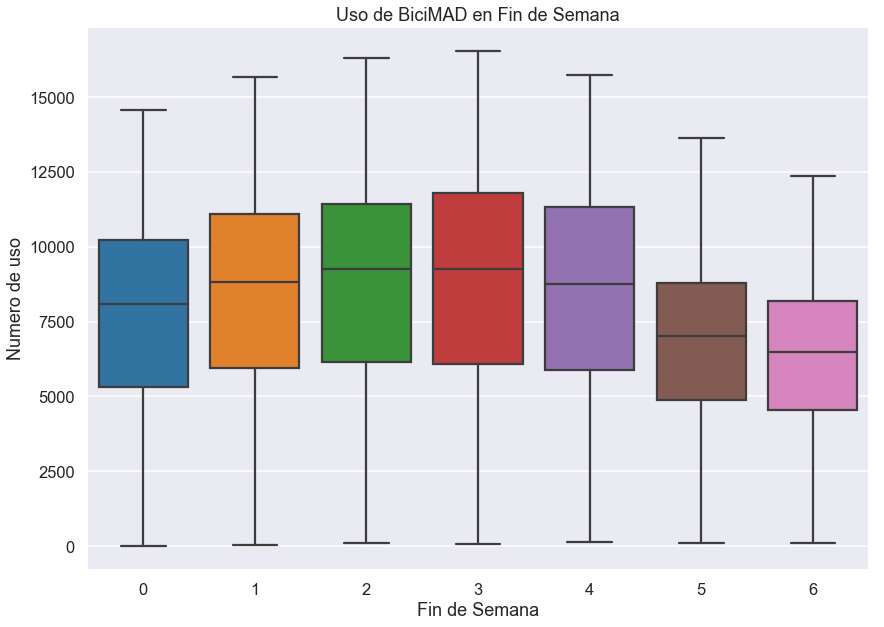

In [24]:
g = sns.boxplot(x='day', y='anual_total_use_day', data=data_usos)

plt.title('Uso de BiciMAD por Día de la Semana')
plt.xlabel('Dia de la Semana')
plt.ylabel("Cantidad de Usos")
plt.show()

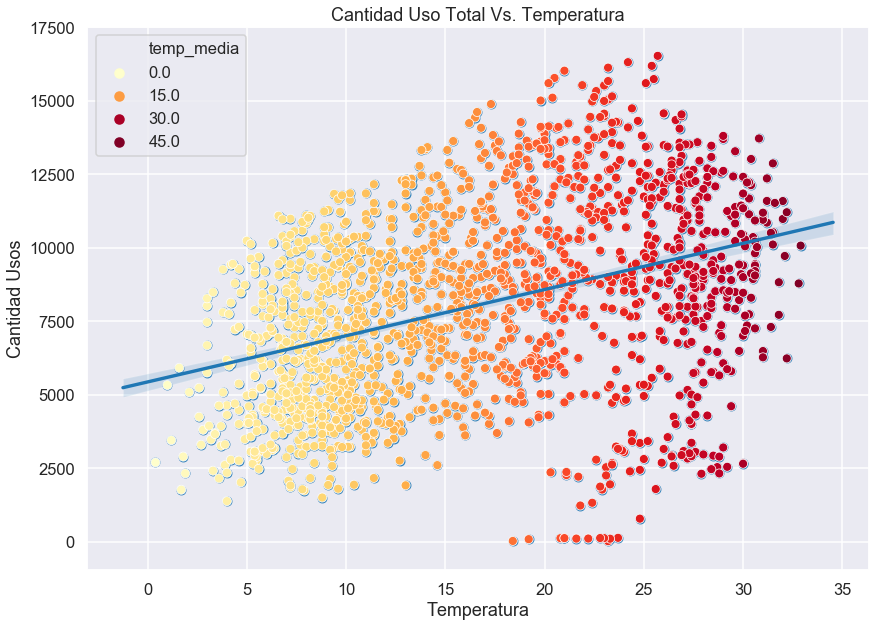

In [23]:
out = sns.regplot(x='temp_media', y='anual_total_use_day', color = 'black', data=data_usos[data_usos.year != 2014])
out = sns.scatterplot(x='temp_media', y='anual_total_use_day', data=data_usos , hue='temp_media', palette='YlOrRd')

plt.xlabel('Temperatura °C')
plt.ylabel('Cantidad Usos')
plt.title('Cantidad Uso Total Vs. Temperatura')
plt.show()

In [ ]:
g = sns.catplot(x="month", y='anual_total_use_day', col="year",
                 data=data_usos[data_usos.year != 2014], palette='BuPu', kind="box", margin_titles=True)

(g.set_axis_labels("Mes", "Cantidad de Usos")
 .set_titles("{col_name} {col_var}")
 .despine(left=True))
plt.show()

In [ ]:
g = sns.catplot(x="day", y='anual_total_use_day', col="year",
                 data=data_usos[data_usos.year != 2014], palette='bright', kind="box", margin_titles=True)

(g.set_axis_labels("Dia de la Semana", "Cantidad de Usos")
 .set_titles("{col_name} {col_var}")
 .despine(left=True))
plt.show()

In [ ]:
data_usos.season = data_usos.season.astype('category')
data_usos.weekend = data_usos.weekend.astype('category')
data_usos.month = data_usos.month.astype('category')
data_usos.year = data_usos.year.astype('category')

In [3]:
query = '''
SELECT DATE(b.unplug_hourtime), count(b.idunplug_station)
FROM bike_movement as b
JOIN station as s
ON b.idunplug_station = s.id
WHERE s.name = 'Plaza de la Cebada' and b.user_type_code <> 3
GROUP BY DATE(unplug_hourtime)
HAVING DATE(unplug_hourtime) > '2017-12-31' and DATE(unplug_hourtime) < '2019-01-01'
ORDER BY DATE(unplug_hourtime)
'''

plaza_cebada = pd.read_sql(query, conn)


In [28]:
plaza_cebada.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 2 columns):
date     347 non-null object
count    347 non-null int64
dtypes: int64(1), object(1)
memory usage: 5.5+ KB


In [35]:
plaza_cebada.head()

,date,count
0,2018-01-01,46
1,2018-01-02,71
2,2018-01-03,95
3,2018-01-04,103
4,2018-01-05,75


In [16]:
plz_cebada.tail()
plz_cebada.iloc[420:440,]

,date,plaza_cebada
422,2018-06-17,174
423,2018-06-18,157
424,2018-06-19,160
425,2018-06-20,187
426,2018-06-21,191
427,2018-06-22,195
428,2018-06-23,171
429,2018-06-24,170
430,2018-06-25,180
431,2018-06-26,170


In [13]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 10
sns.set_context('talk')
sns.set_style("darkgrid")

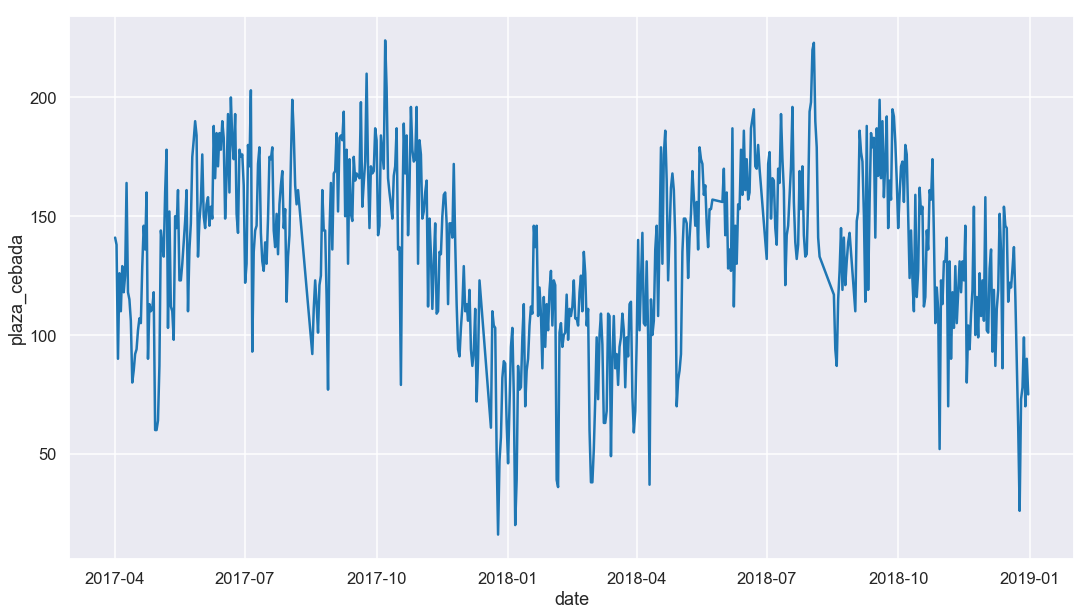

In [7]:
sns.lineplot(data=plz_cebada, x='date',
                   y='plaza_cebada',
                   linewidth=2.5, legend='full')

In [13]:
plz_cebada = plz_cebada.drop([248, 485, 471, 129, 472, 432])

In [8]:
plz_cebada = plz_cebada.apply(lambda fila: fila.str.strip() if fila.dtype == 'object' else fila)

In [15]:
plz_cebada['date'] = plz_cebada['date'].str[:11]
plz_cebada['date'] = [str(i) for i in plz_cebada.date]
plz_cebada['date'] = plz_cebada.date.apply(cast_date)

In [ ]:
query = '''
SELECT DATE(b.unplug_hourtime), count(b.idunplug_station)
FROM bike_movement as b
JOIN station as s
ON b.idunplug_station = s.id
WHERE s.name = 'Paseo Moret' and b.user_type_code <> 3
GROUP BY DATE(unplug_hourtime)
HAVING DATE(unplug_hourtime) > '2017-12-31' and DATE(unplug_hourtime) < '2019-01-01'
ORDER BY DATE(unplug_hourtime)
'''

paseo_moret = pd.read_sql(query, conn)


In [5]:
paseo_moret = pd.read_csv('data/plz_cebada', index_col = 0)

In [9]:
paseo_moret['date'] = paseo_moret['date'].str[:11]
paseo_moret['date'] = [str(i) for i in paseo_moret.date]
paseo_moret['date'] = paseo_moret.date.apply(cast_date)

In [45]:
station = plz_cebada.merge(paseo_moret, how ='left', on = 'date')

In [46]:
station.head()

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,paseo_moret
0,6999,2017-04-01,0.0,17.3,12.6,8.0,3.3,9.0,2,1,5,4,2017,760,0,1,299.29,15.0
1,6737,2017-04-02,0.0,19.0,12.8,6.7,2.2,16.0,2,1,6,4,2017,762,0,1,361.00,9.0
2,8290,2017-04-03,0.0,19.3,12.5,5.7,1.1,26.0,2,0,0,4,2017,765,0,1,372.49,15.0
3,9173,2017-04-04,0.0,22.0,14.5,7.0,1.4,39.0,2,0,1,4,2017,768,0,1,484.00,18.0
4,8953,2017-04-05,0.0,19.0,13.6,8.2,3.1,16.0,2,0,2,4,2017,770,0,1,361.00,15.0


In [25]:
tmp = station.copy()

In [68]:
tmp = tmp.drop(['temp_media', 'temp_max2'], 1)

Queremos encontrar en que meses tiene valores nulos el conjunto de datos. Encontramos que los hay **NaN** en el mes 5, 8 y 12.

In [26]:
tmp[tmp['plaza_cebada'].isnull()]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
129,8844,2017-08-08,0.0,30.2,24.0,17.7,1.9,9.0,3,0,1,8,2017,843,0,0,912.04,NaN
130,8764,2017-08-09,0.0,29.8,22.8,15.8,2.2,11.0,3,0,2,8,2017,840,0,0,888.04,NaN
131,8440,2017-08-10,0.0,27.0,19.8,12.5,2.2,7.0,3,0,3,8,2017,838,0,0,729.00,NaN
132,7573,2017-08-11,0.0,28.5,21.0,13.4,1.1,12.0,3,0,4,8,2017,836,0,0,812.25,NaN
133,5341,2017-08-12,0.0,32.4,25.0,17.6,1.4,10.0,3,1,5,8,2017,834,0,0,1049.76,NaN
134,4973,2017-08-13,0.0,33.5,26.8,20.2,1.7,17.0,3,1,6,8,2017,831,0,0,1122.25,NaN
135,6536,2017-08-14,0.0,35.0,28.2,21.3,1.7,12.0,3,0,0,8,2017,829,0,0,1225.00,NaN
136,5781,2017-08-15,0.0,34.6,28.5,22.4,2.8,7.0,3,0,1,8,2017,827,1,0,1197.16,NaN
137,8001,2017-08-16,0.0,34.6,27.6,20.6,1.1,23.0,3,0,2,8,2017,824,0,0,1197.16,NaN
256,9420,2017-12-13,0.0,8.6,4.2,-0.3,0.6,55.0,4,0,2,12,2017,559,0,1,73.96,NaN


In [64]:
tmp[tmp['wind_speed'].isnull()]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
110,12439,2017-07-20,0.0,34.1,2.2,2.2,NaN,16.0,3,0,3,7,2017,879,0,0,NaN,179.0


In [227]:
tmp[tmp['month'] == 8]['wind_speed'].value_counts(dropna=False)

 1.1    13
 2.2     9
 1.7     9
 1.4     9
 1.9     8
 0.8     4
 2.8     3
 2.5     3
 0.6     1
 3.6     1
 0.0     1
NaN      1
Name: wind_speed, dtype: int64

In [281]:
tmp.iloc[110:111,]

,anual_total_use_day,date,precipitation,temp_max,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,plaza_cebada
110,12439,2017-07-20,0.0,34.1,20.7,2.2,16.0,3,0,3,7,2017,879,0,0,179.0


In [30]:
pjuly2017 = tmp[(tmp['month'] == 7) & (tmp['year'] == 2017)]
paugust2017 = tmp[(tmp['month'] == 8) & (tmp['year'] == 2017)]

In [278]:
paugust2017.head()

,anual_total_use_day,date,precipitation,temp_max,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,plaza_cebada
122,9935,2017-08-01,0.0,33.0,20.0,1.7,15.0,3,0,1,8,2017,857,0,0,142.0
123,10519,2017-08-02,NaN,NaN,NaN,NaN,26.0,3,0,2,8,2017,855,0,0,173.0
124,10228,2017-08-03,0.0,36.7,22.5,1.4,27.0,3,0,3,8,2017,853,0,0,199.0
125,9207,2017-08-04,0.0,37.5,23.6,1.1,21.0,3,0,4,8,2017,851,0,0,185.0
126,6235,2017-08-05,0.0,39.2,25.1,2.2,16.0,3,1,5,8,2017,849,0,0,163.0


In [69]:
import math
def remNaN_J17_pre(element):
    if math.isnan(element):
        return pjuly2017['precipitation'].median()
    else:
        return element
    
def remNaN_J17_tmax(element):
    if math.isnan(element):
        return pjuly2017['temp_max'].median()
    else:
        return element
    
def remNaN_J17_tmin(element):
    if math.isnan(element):
        return pjuly2017['temp_min'].median()
    else:
        return element
    
def remNaN_J17_wind(element):
    if math.isnan(element):
        return pjuly2017['wind_speed'].median()
    else:
        return element

In [70]:
tmp.iloc[91:121,2] = tmp.precipitation.apply(remNaN_J17_pre)
tmp.iloc[91:121,3] = tmp.temp_max.apply(remNaN_J17_tmax)
tmp.iloc[91:121,4] = tmp.temp_min.apply(remNaN_J17_tmin)
tmp.iloc[91:121,5] = tmp.wind_speed.apply(remNaN_J17_wind)

In [33]:
def remNaN_A17_pre(element):
    if math.isnan(element):
        return paugust2017['precipitation'].median()
    else:
        return element
    
def remNaN_A17_tmax(element):
    if math.isnan(element):
        return paugust2017['temp_max'].median()
    else:
        return element
    
def remNaN_A17_tmin(element):
    if math.isnan(element):
        return paugust2017['temp_min'].median()
    else:
        return element
    
def remNaN_A17_wind(element):
    if math.isnan(element):
        return paugust2017['wind_speed'].median()
    else:
        return element

In [34]:
tmp.loc[122:153, 'precipitation'] = tmp.precipitation.apply(remNaN_A17_pre)
tmp.loc[122:153, 'temp_max'] = tmp.temp_max.apply(remNaN_A17_tmax)
tmp.loc[122:153, 'temp_min'] = tmp.temp_min.apply(remNaN_A17_tmin)
tmp.loc[122:153, 'wind_speed'] = tmp.wind_speed.apply(remNaN_A17_wind)

In [35]:
tmp.iloc[91:121,]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,plaza_cebada
91,8144,2017-07-01,0.0,25.0,12.6,2.2,2.2,4.0,3,1,5,7,2017,900,0,1,625.00,122.0
92,7340,2017-07-02,0.0,31.6,13.4,3.1,3.1,8.0,3,1,6,7,2017,900,0,1,998.56,130.0
93,11905,2017-07-03,0.0,34.0,18.0,0.8,0.8,17.0,3,0,0,7,2017,899,0,1,1156.00,180.0
94,12701,2017-07-04,0.0,35.5,21.0,2.5,2.5,16.0,3,0,1,7,2017,898,0,1,1260.25,171.0
95,13090,2017-07-05,3.5,35.5,21.2,2.2,2.2,13.0,3,0,2,7,2017,897,0,1,1260.25,203.0
96,6135,2017-07-06,25.2,22.2,16.4,2.2,2.2,29.0,3,0,3,7,2017,896,0,1,492.84,93.0
97,7721,2017-07-07,19.3,25.3,15.9,2.2,2.2,27.0,3,0,4,7,2017,895,0,1,640.09,135.0
98,7588,2017-07-08,1.3,24.9,15.8,0.0,0.0,19.0,3,1,5,7,2017,895,0,0,620.01,144.0
99,7862,2017-07-09,0.0,31.5,16.6,1.9,1.9,28.0,3,1,6,7,2017,894,0,0,992.25,146.0
100,11684,2017-07-10,0.0,32.2,18.5,1.9,1.9,17.0,3,0,0,7,2017,892,0,0,1036.84,172.0


In [36]:
aug17week = tmp[(tmp['month'] == 8) & (tmp['year'] == 2017) & (tmp['weekend'] == 0) & (tmp['precipitation'] == 0)]
aug17wkend = tmp[(tmp['month'] == 8) & (tmp['year'] == 2017) & (tmp['weekend'] == 1)]

In [37]:
def remNaN_A17_week(element):
    if math.isnan(element):
        return aug17week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_A17_wkend(element):
    if math.isnan(element):
        return aug17wkend['plaza_cebada'].median()
    else:
        return element

In [38]:
tmp.loc[129:132, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_A17_week)
tmp.loc[133:134, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_A17_wkend)
tmp.loc[135:137, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_A17_week)

In [40]:
dic17week = tmp[(tmp['month'] == 12) & (tmp['year'] == 2017) & (tmp['weekend'] == 0) & (tmp['holiday'] == 0) & (tmp['unicom'] == 1)]
dic17wkend = tmp[(tmp['month'] == 12) & (tmp['year'] == 2017) & (tmp['weekend'] == 1)]

In [41]:
def remNaN_D17_week(element):
    if math.isnan(element):
        return dic17week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_D17_wkend(element):
    if math.isnan(element):
        return dic17wkend['plaza_cebada'].median()
    else:
        return element

In [42]:
tmp.loc[256:258, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_D17_week)
tmp.loc[259:260, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_D17_wkend)
tmp.loc[261:262, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_D17_week)

In [43]:
may18week = tmp[(pc_dia2['month'] == 5) & (tmp['year'] == 2018) & (tmp['weekend'] == 0) & (tmp['holiday'] == 0)]
may18wkend = tmp[(pc_dia2['month'] == 5) & (tmp['year'] == 2018) & (tmp['weekend'] == 1)]

In [44]:
def remNaN_M18_week(element):
    if math.isnan(element):
        return may18week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_M18_wkend(element):
    if math.isnan(element):
        return may18wkend['plaza_cebada'].median()
    else:
        return element

In [45]:
tmp.loc[418:419, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_M18_week)
tmp.loc[420:421, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_M18_wkend)
tmp.loc[422:424, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_M18_week)

In [46]:
june18week = tmp[(tmp['month'] == 6) & (tmp['year'] == 2018) & (tmp['weekend'] == 0)]
june18wkend = tmp[(tmp['month'] == 6) & (tmp['year'] == 2018) & (tmp['weekend'] == 1)]

In [47]:
def remNaN_J18_week(element):
    if math.isnan(element):
        return june18week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_J18_wkend(element):
    if math.isnan(element):
        return june18wkend['plaza_cebada'].median()
    else:
        return element

In [48]:
tmp.loc[452:454, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_J18_week)
tmp.loc[455:456, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_J18_wkend)

In [49]:
aug18week = tmp[(tmp['month'] == 8) & (tmp['year'] == 2018) & (tmp['weekend'] == 0)]
aug18wkend = tmp[(tmp['month'] == 8) & (tmp['year'] == 2018) & (tmp['weekend'] == 1)]

In [50]:
def remNaN_A18_week(element):
    if math.isnan(element):
        return aug18week['plaza_cebada'].median()
    else:
        return element
    
def remNaN_A18_wkend(element):
    if math.isnan(element):
        return aug18wkend['plaza_cebada'].median()
    else:
        return element

In [51]:
tmp.loc[494:496, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_A18_week)
tmp.loc[497:498, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_A18_wkend)
tmp.loc[499:517, 'plaza_cebada'] = tmp.plaza_cebada.apply(remNaN_A18_week)

In [71]:
pc_dia2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 640 entries, 0 to 639
Data columns (total 16 columns):
anual_total_use_day    640 non-null int64
date                   640 non-null datetime64[ns]
precipitation          640 non-null float64
temp_max               640 non-null float64
temp_min               640 non-null float64
wind_speed             640 non-null float64
dioxido_nitrogeno      640 non-null float64
season                 640 non-null int64
weekend                640 non-null int64
day                    640 non-null int64
month                  640 non-null int64
year                   640 non-null int64
min_sun                640 non-null int64
holiday                640 non-null int64
unicom                 640 non-null int64
plaza_cebada           640 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(9)
memory usage: 105.0 KB


In [72]:
tmp.to_csv('plz_cebada')

In [6]:
query = '''
SELECT DATE(b.unplug_hourtime) as date, count(b.idunplug_station) as matadero
FROM bike_movement as b
JOIN station as s
ON b.idunplug_station = s.id
WHERE s.name = 'Entrada Matadero' and b.user_type_code <> 3 and b.unplug_hourtime < '2019-01-01'
GROUP BY DATE(unplug_hourtime)
ORDER BY DATE(unplug_hourtime)
'''

matadero = pd.read_sql(query, conn)


In [9]:
matadero.head()

,date,plaza_cebada
0,2017-04-01,108
1,2017-04-02,149
2,2017-04-03,79
3,2017-04-04,76
4,2017-04-05,80


In [10]:
matadero.columns = ['date', 'matadero']

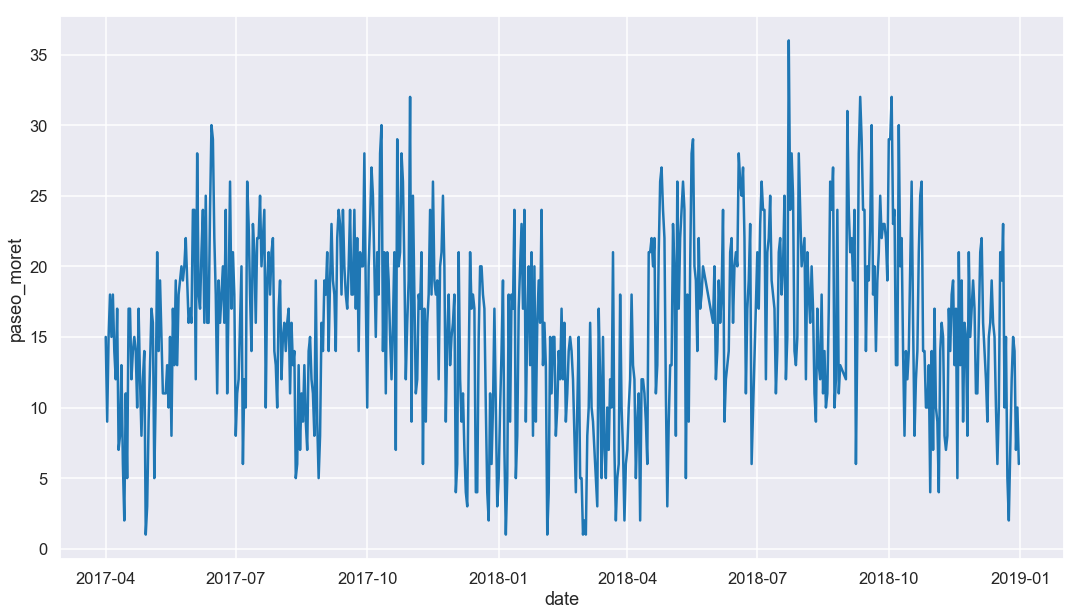

In [50]:
sns.lineplot(data=matadero, x='date',
                   y='matadero',
                   linewidth=2.5, legend='full')

In [17]:
matadero.iloc([129, 248, 485, 471,  472, 432])

TypeError: unhashable type: 'list'

In [42]:
matadero['date'] = matadero['date'].str[:11]
matadero['date'] = [str(i) for i in matadero.date]
matadero['date'] = matadero.date.apply(cast_date)

In [67]:
matadero[matadero['matadero'].isnull()]

,anual_total_use_day,date,precipitation,temp_max,temp_media,temp_min,wind_speed,dioxido_nitrogeno,season,weekend,day,month,year,min_sun,holiday,unicom,temp_max2,paseo_moret
419,7978,2018-05-25,8.9,19.5,15.8,12.0,0.0,33.0,2,0,4,5,2018,882,0,1,380.25,NaN
420,9442,2018-05-26,0.0,22.0,16.9,11.8,0.0,19.0,2,1,5,5,2018,883,0,1,484.00,NaN
421,9893,2018-05-27,3.6,25.5,19.3,13.1,0.0,21.0,2,1,6,5,2018,885,0,1,650.25,NaN
422,6334,2018-05-28,13.8,17.8,15.5,13.2,0.0,29.0,2,0,0,5,2018,886,0,1,316.84,NaN
423,9451,2018-05-29,1.0,19.9,16.2,12.6,0.0,34.0,2,0,1,5,2018,887,0,1,396.01,NaN
424,11388,2018-05-30,0.2,18.6,14.8,11.0,0.0,24.0,2,0,2,5,2018,889,0,1,345.96,NaN


In [ ]:
sol = pd.read_excel('sol.xlsx', header=None)

In [ ]:
sol.columns = ['horas']

In [ ]:
def extrae_hora(h):
    try:
        _, _, _, _, horas_sol, _, _, _, _, _, _, _, = h.horas.split(' ')
        return horas_sol
    except:
        return None

sol['horas_sol'] = sol.apply(extrae_horas, axis = 1)

In [ ]:
def extrae_minutos(m):
    try:
        _, minutos, = m.horas_sol.split(':')
        return minutos
    except:
        return None

sol['minutos'] = sol.apply(extrae_minutos, axis = 1)

In [ ]:
def extrae_h(h):
    try:
        horas, _, = h.horas_sol.split(':')
        return horas
    except:
        return None

sol['horas_t'] = sol.apply(extrae_h, axis = 1)

In [ ]:
sol['horas_t'] = pd.to_numeric(sol['horas_t'])
sol['minutos'] = pd.to_numeric(sol['minutos'])

In [ ]:
sol['h_sun'] = sol['horas_t'] + sol['minutos']/60

In [ ]:
sol = sol.drop(['horas', 'horas_sol', 'minutos'], 1)

In [ ]:
plt.plot('min_sun', data = sol)

In [ ]:
mad_holidays = holidays.CountryHoliday('ES', prov='MAD')

In [ ]:
def holiday(x):
    if x.date in mad_holidays:
        return 1
    else:
        return 0

In [ ]:
data_usos['holiday'] = data_usos.apply(holiday, axis = 1)